In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train = x_train / 255.0

In [5]:
y_train = pd.get_dummies(y_train)

In [6]:
model = tf.keras.models.Sequential()
# Add our first layer
model.add(tf.keras.layers.Input((28, 28), name="Input"))
# Flattening Layer
model.add(tf.keras.layers.Flatten(name = "Flatten"))
# Hidden Layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu, name = "Hidden"))
# Output Layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name="Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# define loss function, what optimizer to use



In [8]:
model.fit(x=x_train, y=y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.5185 - acc: 0.8640 - val_loss: 0.2608 - val_acc: 0.9277
Epoch 2/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2897 - acc: 0.9176 - val_loss: 0.2117 - val_acc: 0.9410
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2412 - acc: 0.9321 - val_loss: 0.1829 - val_acc: 0.9492
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2087 - acc: 0.9413 - val_loss: 0.1653 - val_acc: 0.9550
Epoch 5/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1843 - acc: 0.9484 - val_loss: 0.1479 - val_acc: 0.9612
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1653 - acc: 0.9538 - val_loss: 0.1331 - val_acc: 0.9658
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1498 - acc: 0.9572 - val_loss: 0.1228 - val_acc: 0.9680
Epoch 8/10
3375/3375 [==============================] - 8s 2ms

Text(0.5, 1.0, 'Accuracy of Model')

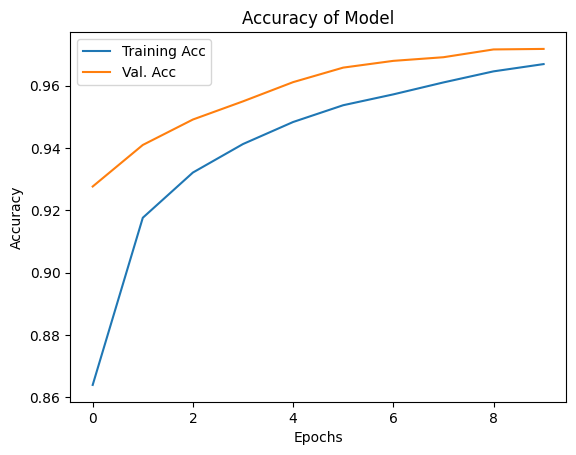

In [9]:
plt.plot(model.history.history["acc"], label = "Training Acc")
plt.plot(model.history.history["val_acc"], label = "Val. Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model")

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.5236 - acc: 0.8618 - val_loss: 0.2610 - val_acc: 0.9258
Epoch 2/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2934 - acc: 0.9162 - val_loss: 0.2147 - val_acc: 0.9397
Epoch 3/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2433 - acc: 0.9306 - val_loss: 0.1837 - val_acc: 0.9493
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2092 - acc: 0.9402 - val_loss: 0.1603 - val_acc: 0.9585
Epoch 5/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1838 - acc: 0.9474 - val_loss: 0.1418 - val_acc: 0.9635
Epoch 6/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1637 - acc: 0.9535 - val_loss: 0.1305 - val_acc: 0.9657
Epoch 7/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1475 - acc: 0.9581 - val_loss: 0.1220 - val_acc: 0.9663
Epoch 8/10
3375/3375 [==============================] - 8s 2ms

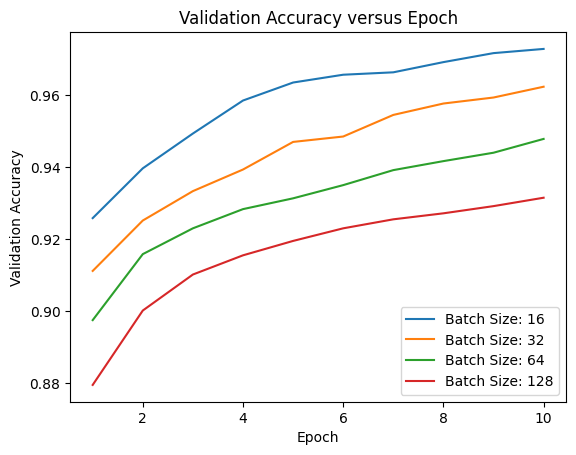

In [16]:
batch_sizes = [16, 32, 64, 128]
val_accs = []
for batch_size in batch_sizes:
  model = tf.keras.models.Sequential()
  # Add our first layer
  model.add(tf.keras.layers.Input((28, 28), name="Input"))
  # Flattening Layer
  model.add(tf.keras.layers.Flatten(name = "Flatten"))
  # Hidden Layer
  model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu, name = "Hidden"))
  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name="Output"))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"]) #Accuracy
  history = model.fit(x_train,y_train,batch_size=batch_size,
                        validation_split=0.1,
                        epochs=10)
  val_accs.append(history.history['val_acc'])
epochs = range(1, len(val_accs[0]) + 1)


for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs,val_accs[i], label=f'Batch Size: {batch_size}')
plt.title('Validation Accuracy versus Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()







